<a href="https://colab.research.google.com/github/agamthind96/Deep-Learning-Projects/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Preprocess the data

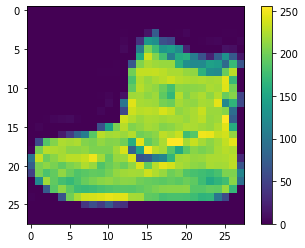

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show();


In [ ]:
train_images = train_images/255.0
train_images[456]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.22745098,
        0.56862745, 0.41568627, 0.43529412, 0.20392157, 0.3254902 ,
        0.49803922, 0.41568627, 0.39607843, 0.57254902, 0.09019608,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.38039216,
        0.63137255, 0.68627451, 0.69803922, 0.71372549, 0.90196078,
        0.99607843, 0.62352941, 0.49803922, 0.56078431, 0.31372549,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.41568627,
        0.6745098 , 0.60392157, 0.50196078, 0.63921569, 0.99607843,
        0.66666667, 0.6117

In [ ]:
test_images = test_images/255.0

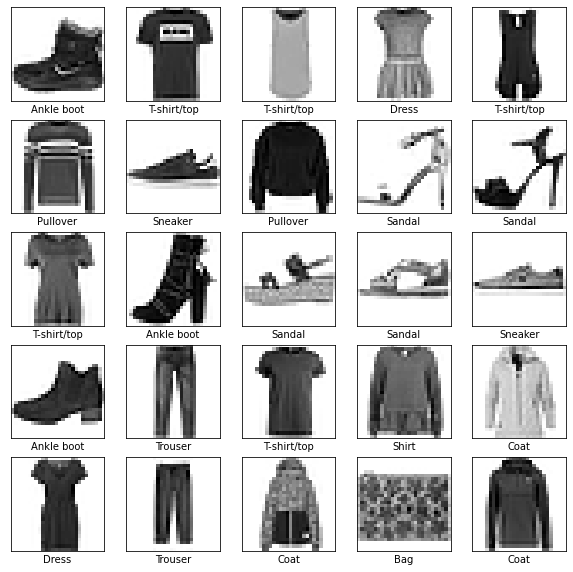

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25) :
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show();

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(10)
])


In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4984 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3770 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3388 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3150 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2805 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2706 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2596 - accuracy: 0.9025
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2483 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
60000/32


1875.0

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Accuracy : ", test_accuracy)

313/313 - 1s - loss: 0.3454 - accuracy: 0.8820 - 503ms/epoch - 2ms/step
Test Accuracy :  0.8820000290870667


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])


In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
tf.math.argmax(predictions[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [ ]:
class_names[9]

'Ankle boot'

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = tf.math.argmax(predictions_array)
  if predicted_label == true_label :
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel(" {} {:2.0f}% ({}) ".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                          color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



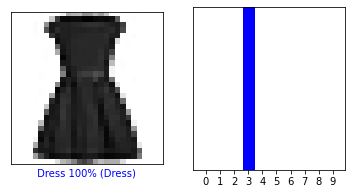

In [ ]:
i = 5678
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show();

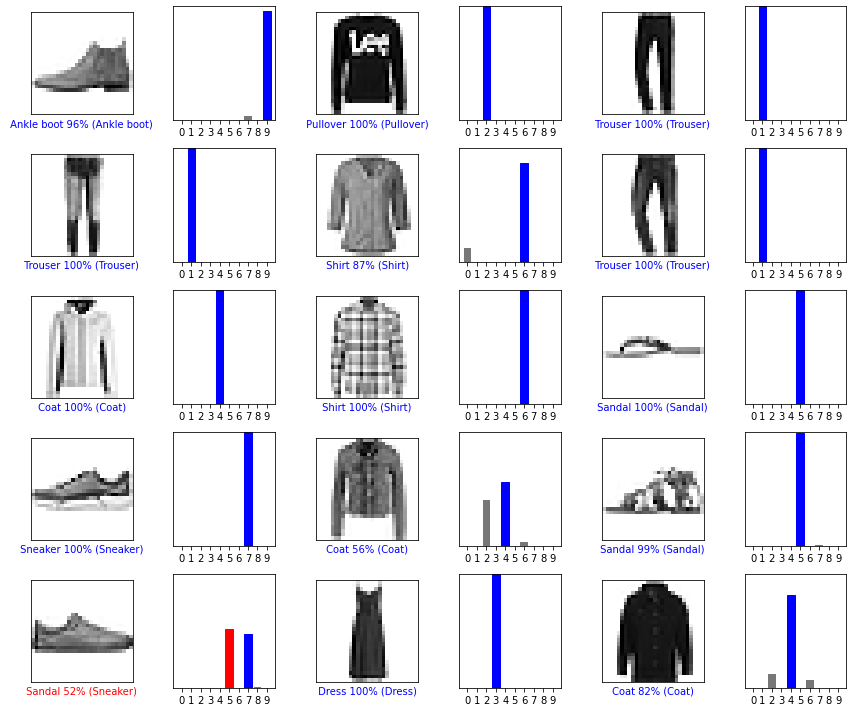

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()